<a href="https://colab.research.google.com/github/Geletinousamigo/14_days_challenge/blob/Nikhil-Parab/nikhil/Day%202/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the Libraries and the Dataset


In [1]:
import pandas as pd
import numpy as np

##Reading the Data

### We have a selected boston housing dataset for this algorithm.

In [18]:
data = pd.read_csv("HousingData.csv")
data.head() # displays the first 5 rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


##Checking Null values in the dataset

To check the null values in the dataset we use the function .isnull() and to find the sum of the null values present in our dataset we use .isnull.sum() 

In [4]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

##Droping the null values from the dataset

For better prediction accuracy we need to drop the rows which contains null values. So we use .dropna() function for dropping the rows which has null values.

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum() # rechecking to find whether the dataset has any null values or not

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##Checking at the dependent and the Independent variables

Independent Variable : An independent variable is exactly what it sounds like. It is a variable that stands alone and isn't changed by the other variables you are trying to measure. For example, someone's age might be an independent variable. Other factors (such as what they eat, how much they go to school, how much television they watch) aren't going to change a person's age.

Dependent Variable : Just like an independent variable, a dependent variable is exactly what it sounds like. It is something that depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it. 

In this case we have lower status 'LSTAT' as dependent variable and 'MEDV' as independent variable

In [7]:
data1= data.loc[:,['LSTAT','MEDV']]
data1.head(5)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
5,5.21,28.7


##Visualizing the change in the variables

Visualization is an important tool to analyze our data. With visualization we can able to understand whether our data have outliers, whether is skewed or not skewed. 

Here, we are plotting a simple graph between 'LSTAT' and 'MEDV' to check relation between them

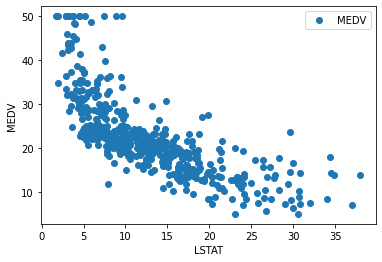

In [19]:
import matplotlib.pyplot as plt
data.plot(x='LSTAT', y='MEDV', style='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

##Dividing the data into independent and dependent variables

This is a common method for splitting the data into two variables which is further determined to predict the accuracy


In [9]:
X = pd.DataFrame(data['LSTAT'])
y = pd.DataFrame(data['MEDV'])

##Splitting the data into train and test sets

So, train-test split is a method for splitting the data 

This is split it into 4 parts namely:
X_train, X_test , y_train, y_test

As in machine learning we are feeding the data to the algorithm with correct output, this data will be used by machine and will predict the values and the accuracy for the test data.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

##Checking the shape of train and test sets

This helps to know how much data is there in each of variable.



In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(275, 1)
(119, 1)
(275, 1)
(119, 1)


##Training the Algorithm

This is the core of Linear Regression.
This is the part where we are calling Linear Regression from scikit-learn 

Then we are storing the Linear Regression in a variable called regressor

Then we are fitting the X_train, y_train in regressor.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Checking the intercept

We are checking the intercept i.e.'c' from y=mx+c

This line is the linear regression line from the above algorithm which we fitted.

In [13]:
print(regressor.intercept_)

[34.944997]


##Checking the slope

This is the slope 'm' from y=mx+c

In [14]:
print(regressor.coef_)

[[-1.00135706]]


##Checking the model evaluation using RMSE

This method helps in the evaluation of the algorithm which we had coded above. 

In [15]:
y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.009611655189927




y_test_predict helps to predict the accuracy of the code

In [16]:
y_test_predict = regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 6.407194718831085


In [17]:
print(y_test_predict)

[[23.58960797]
 [25.42209139]
 [15.90919935]
 [ 8.48914355]
 [27.49490049]
 [31.40019302]
 [28.72656967]
 [22.65834591]
 [28.28597257]
 [20.8258625 ]
 [17.65156063]
 [24.96146714]
 [11.64341828]
 [31.7807087 ]
 [16.23964718]
 [29.72792673]
 [20.28512968]
 [29.74795387]
 [ 4.97438029]
 [26.28325846]
 [25.48217281]
 [23.28920086]
 [ 5.6152488 ]
 [27.5950362 ]
 [15.76900936]
 [ 7.52784078]
 [22.49812878]
 [ 4.09318608]
 [29.2973432 ]
 [24.96146714]
 [17.13085496]
 [18.89324338]
 [29.64781817]
 [17.3211128 ]
 [31.38016588]
 [17.00067854]
 [32.06108867]
 [14.99796442]
 [28.00559259]
 [16.19959289]
 [30.19856455]
 [29.41750604]
 [13.46588813]
 [19.8044783 ]
 [19.53411189]
 [31.12982661]
 [16.99066497]
 [28.94686823]
 [25.41207782]
 [19.37389476]
 [24.66106002]
 [31.41020659]
 [27.54496835]
 [25.85267492]
 [17.7617099 ]
 [25.00152142]
 [ 9.23014778]
 [21.0962289 ]
 [13.59606454]
 [16.79039356]
 [-3.07653045]
 [28.18583686]
 [30.48895809]
 [27.23454766]
 [30.08841527]
 [28.66648825]
 [ 0.12781

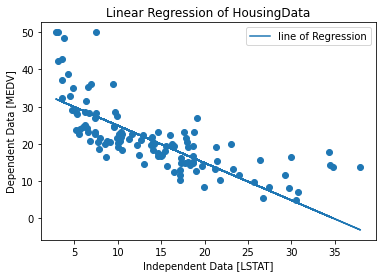

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_predict, label = "line of Regression")
plt.title("Linear Regression of HousingData")
plt.xlabel("Independent Data [LSTAT]")
plt.ylabel("Dependent Data [MEDV]")
plt.legend()
plt.show()